In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mp

In [ ]:
## Importing data from csv files
athlete = pd.read_csv("athlete_events.csv" , on_bad_lines='skip')
region = pd.read_csv("noc_regions.csv")
athlete

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [ ]:
#Displaying the columns in the dataset
athlete.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [ ]:
#The first step is to check the null values in each individual column

print(athlete["ID"].isnull().value_counts())
print("There are no null values in the ID column")

False    271116
Name: ID, dtype: int64
There are no null values in the ID column


In [ ]:
# Checking null values in the name column
print(athlete['Name'].isnull().value_counts())
print("There are no null values in the Name column")

False    271116
Name: Name, dtype: int64
There are no null values in the Name column


In [ ]:
#Checking null values in the Sex column

print(athlete['Sex'].isnull().value_counts(),"\n") 
print("Data in the column \n",athlete['Sex'].value_counts())

False    271116
Name: Sex, dtype: int64 

Data in the column 
 M    196594
F     74522
Name: Sex, dtype: int64


In [ ]:
athlete['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

In [ ]:
#Checking null values in the Age colum
#athlete['Age'] = pd.to_numeric(athlete['Age'], errors='coerce')
print("Checking for null values \n",athlete['Age'].isnull().value_counts(),"\n") #There are 9474 null values
print("Finding invalid age\n", athlete["Age"][(athlete['Age']>100) | (athlete['Age']<0)])

Checking for null values 
 False    261642
True       9474
Name: Age, dtype: int64 

Finding invalid age
 Series([], Name: Age, dtype: float64)


In [ ]:
#Replacing null values with median
mean_val = athlete['Age'].median()
athlete['Age'].fillna(value=mean_val, inplace=True)

print(athlete['Age'].isnull().value_counts(),"\n") 

False    271116
Name: Age, dtype: int64 



In [ ]:
#Checking null values in the Height column
print(athlete['Height'].isnull().value_counts(),"\n") 

False    210945
True      60171
Name: Height, dtype: int64 



In [ ]:
#Replacing null values with median
athlete['Height'] = pd.to_numeric(athlete['Height'], errors='coerce')
mean_val = athlete['Height'].median()
athlete['Height'].fillna(value=mean_val, inplace=True)
print(athlete['Height'].isnull().value_counts(),"\n") 

False    271116
Name: Height, dtype: int64 



In [ ]:
#Checking null values in the weight column
athlete['Weight'] = pd.to_numeric(athlete['Weight'], errors='coerce')
print(athlete['Weight'].isnull().value_counts(),"\n") #There are 62875 null values
print("Chcking for invalid data \n",athlete["Weight"][athlete["Weight"]<=0])

False    208241
True      62875
Name: Weight, dtype: int64 

Chcking for invalid data 
 Series([], Name: Weight, dtype: float64)


In [ ]:
#Replacing null values with median
med_val = athlete['Weight'].median()
athlete['Weight'].fillna(value=med_val, inplace=True)
print(athlete['Weight'].isnull().value_counts(),"\n") 

False    271116
Name: Weight, dtype: int64 



In [ ]:
#Checking null values in the Team column
print(athlete['Team'].isnull().value_counts(),"\n") 
print("Data \n",athlete['Team'].value_counts())

False    271116
Name: Team, dtype: int64 

Data 
 United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
                 ...  
Briar                1
Hannover             1
Nan-2                1
Brentina             1
Digby                1
Name: Team, Length: 1184, dtype: int64


In [ ]:
#Checking null values in the NOC column
print(athlete['NOC'].isnull().value_counts(),"\n") 


False    271116
Name: NOC, dtype: int64 



In [ ]:
#Checking null values in the games column
print(athlete['Games'].isnull().value_counts(),"\n") 

False    271116
Name: Games, dtype: int64 



In [ ]:
#Checking null values for season column
print(athlete['Season'].isnull().value_counts(),"\n") 

False    271116
Name: Season, dtype: int64 



In [ ]:
#Checking null values for city column 
print(athlete['City'].isnull().value_counts(),"\n") 

False    271116
Name: City, dtype: int64 



In [ ]:
#Checking null values in Sport 
print(athlete['Sport'].isnull().value_counts(),"\n") #There are no null values


False    271116
Name: Sport, dtype: int64 



In [ ]:
# Checking null values Event 
print("Checking for null values \n",athlete['Event'].isnull().value_counts(),"\n") 


Checking for null values 
 False    271116
Name: Event, dtype: int64 



In [ ]:
#The null values in Medal column are not actually null. They indicate that there has been no medal acheivement.
print("Checking for null values \n",athlete['Medal'].isnull().value_counts(),"\n") #There are 231333 entries without the medal 
print("Insights on the column \n",athlete['Medal'].describe(),"\n")
print("Data \n",athlete['Medal'].value_counts())

Checking for null values 
 True     231333
False     39783
Name: Medal, dtype: int64 

Insights on the column 
 count     39783
unique        3
top        Gold
freq      13372
Name: Medal, dtype: object 

Data 
 Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


In [ ]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
#Merge both the dataframes
athlete_merged = athlete.merge(region, how = 'left', on = 'NOC')
athlete_merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [ ]:
athlete_merged.shape

(271116, 17)

In [ ]:
athlete_merged.rename(columns={'region': 'Region', 'notes': 'Notes'}, inplace= True)

In [ ]:
athlete_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [ ]:
athlete_merged.describe()
print(type(athlete_merged))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
athlete_merged.isnull().sum()
#There are no columns with null values except the medal column 

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [ ]:
# Athlete details for the country India

athlete_merged.query('Team == "India"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,24.0,175.0,70.0,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,24.0,175.0,70.0,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [ ]:
# Top participating countries in Olympics
top_10_countries = athlete_merged.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

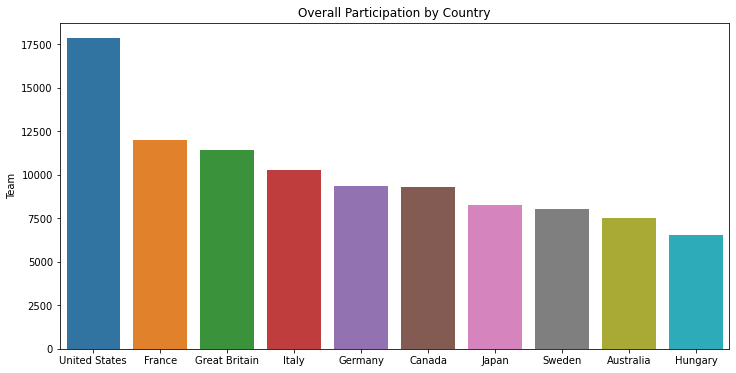

In [ ]:
#Plot for the top 10 countries

plt.figure(figsize=(12,6))
#plt.xticks(rotation=20)
plt.title('Overall Participation by Country')
sns.barplot(x=top_10_countries.index, y=top_10_countries);

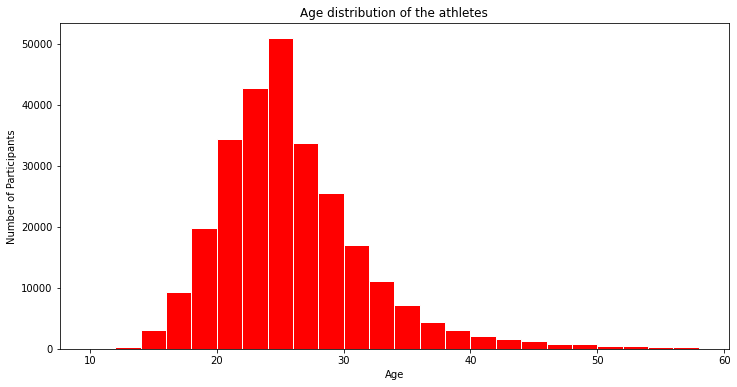

In [ ]:
#Participations according to the age
plt.figure(figsize=(12,6))
plt.title("Age distribution of the athletes")
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.hist(athlete_merged.Age, bins = np.arange(10,60,2), color='red', edgecolor = 'white');

In [ ]:
winter_games = athlete_merged[athlete_merged.Season == 'Winter'].Sport.unique()
winter_games

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [ ]:
summer_games = athlete_merged[athlete_merged.Season == 'Summer'].Sport.unique()
summer_games

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [ ]:
#Participations according to the Gender
gender_count = athlete_merged["Sex"].value_counts()
gender_count.to_frame()

,Sex
M,196594
F,74522


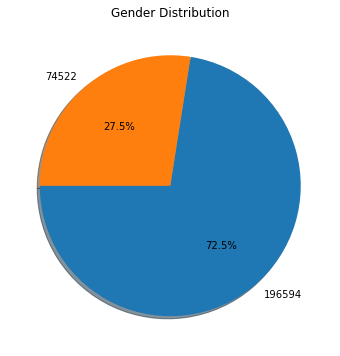

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_count, labels= gender_count, autopct = "%1.1f%%", startangle=180, shadow= True);

In [ ]:
#Different medals count values
athlete_merged.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [ ]:
#Female Participations is Summer olympics
female_participants = athlete_merged[(athlete_merged.Sex=='F')& (athlete_merged.Season=='Summer')][['Sex', 'Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


In [ ]:
summerWomenOlympics = athlete_merged[(athlete_merged.Sex == 'F') & (athlete_merged.Season == 'Summer')]

Text(0.5, 1.0, 'Women Participation')

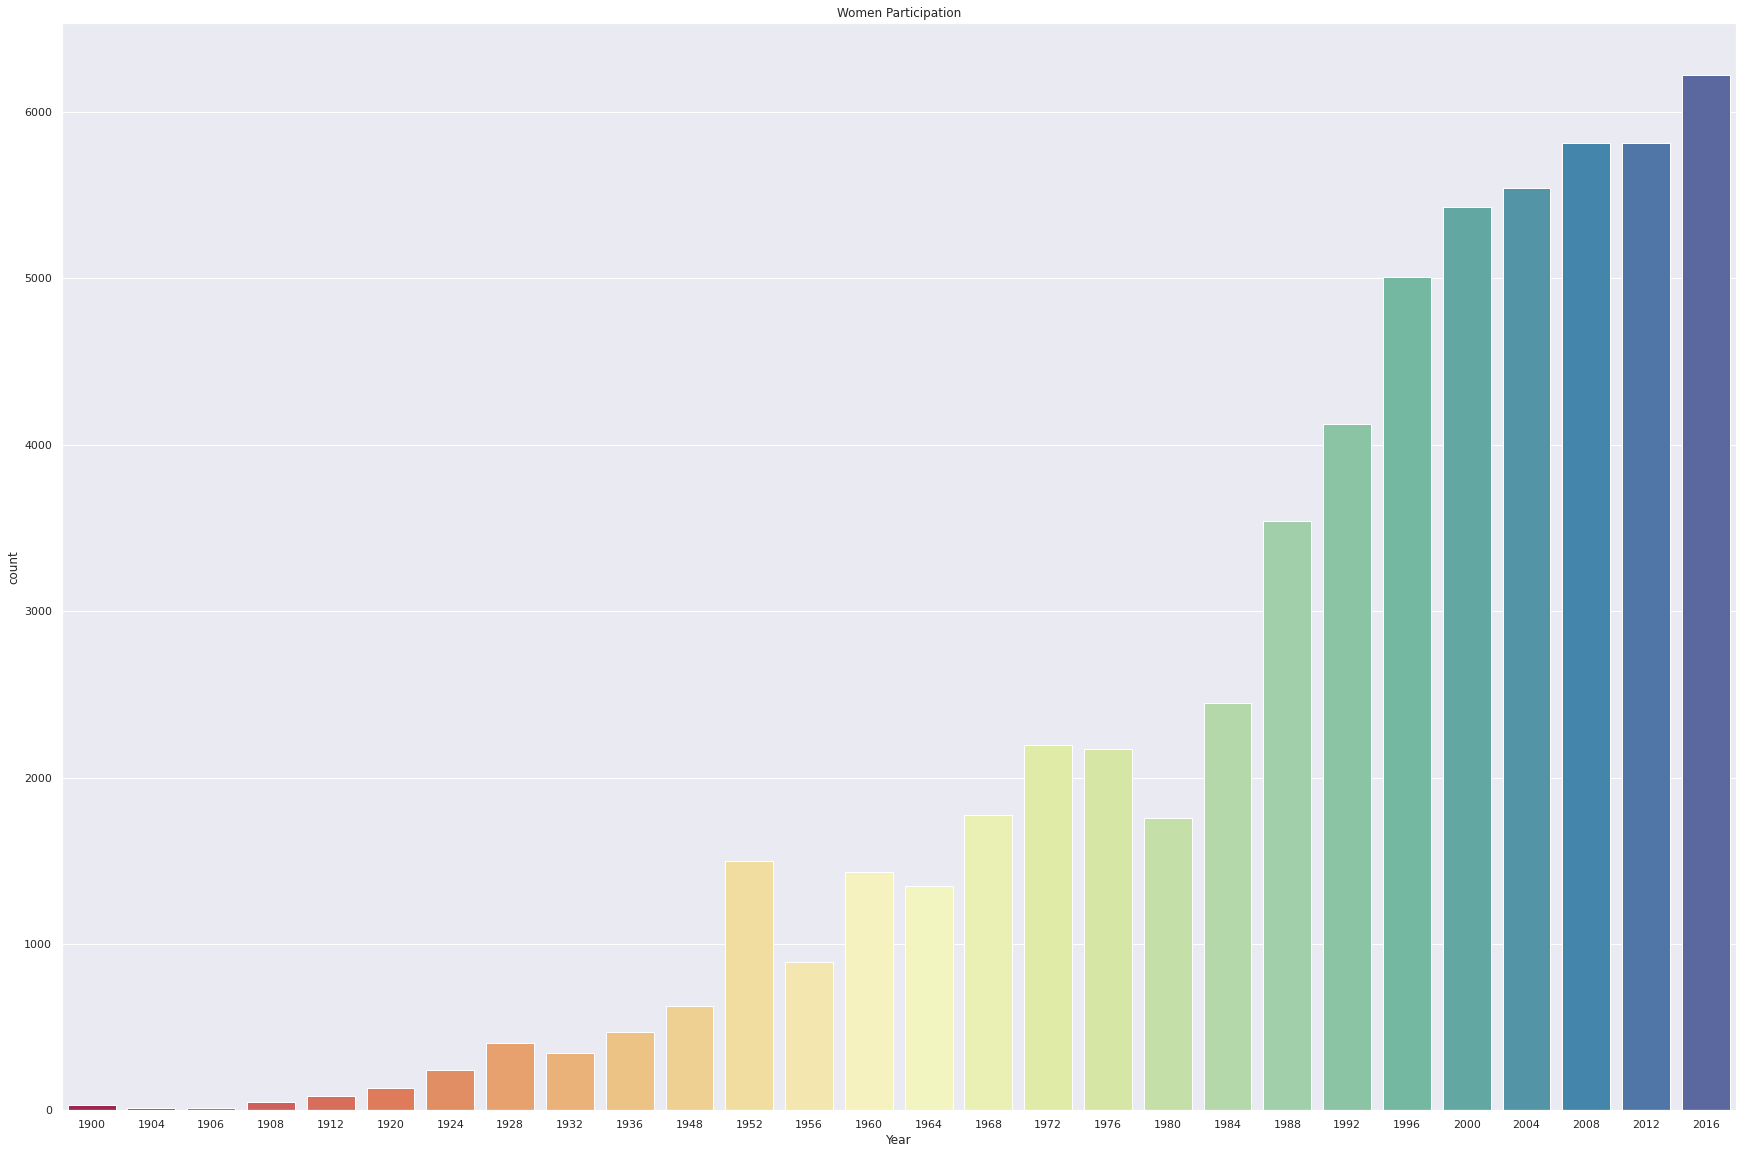

In [ ]:
#Women Participations in summer olympics
sns.set(style="darkgrid")
plt.figure(figsize=(30,20))
sns.countplot(x='Year', data=summerWomenOlympics, palette="Spectral")
plt.title('Women Participation')

Text(0.5, 1.0, 'Plot of Female Athletes over time')

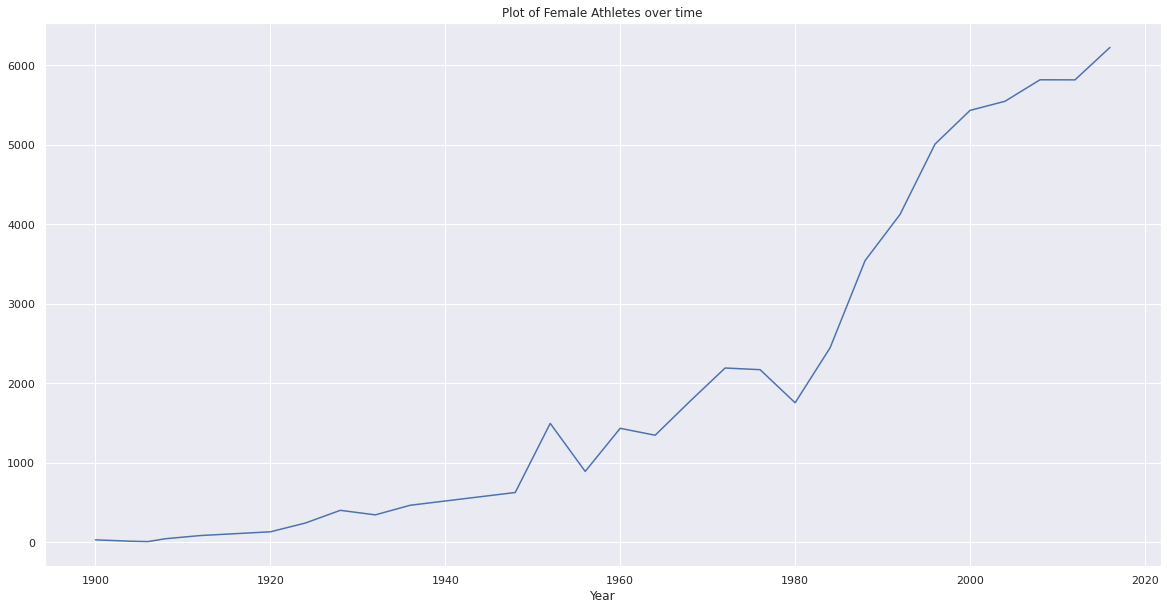

In [ ]:
part = summerWomenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'F'].plot()
plt.title('Plot of Female Athletes over time')

In [ ]:
summerMenOlympics = athlete_merged[(athlete_merged.Sex == 'M') & (athlete_merged.Season == 'Summer')]

Text(0.5, 1.0, 'Men Participation')

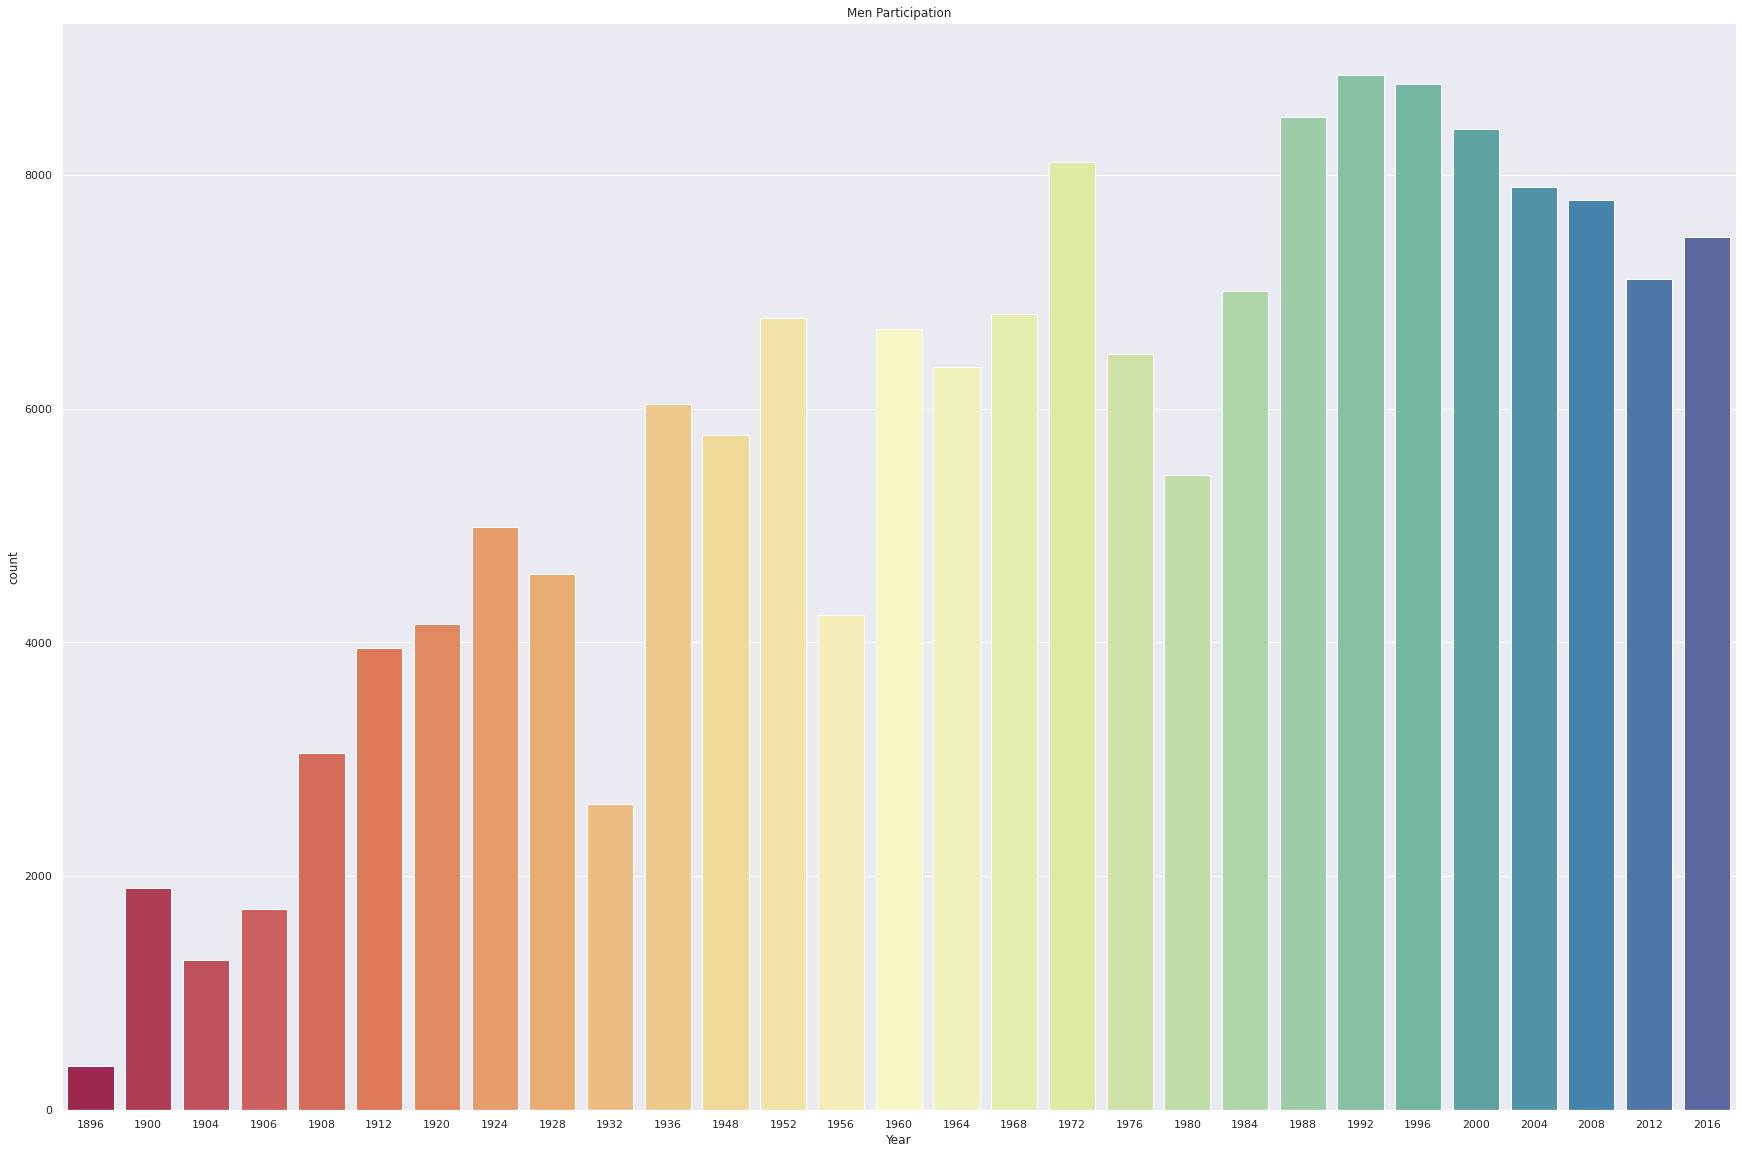

In [ ]:
#Men Participations in summer olympics
sns.set(style="darkgrid")
plt.figure(figsize=(30,20))
sns.countplot(x='Year', data=summerMenOlympics, palette="Spectral")
plt.title('Men Participation')

Text(0.5, 1.0, 'Plot of Female Athletes over time')

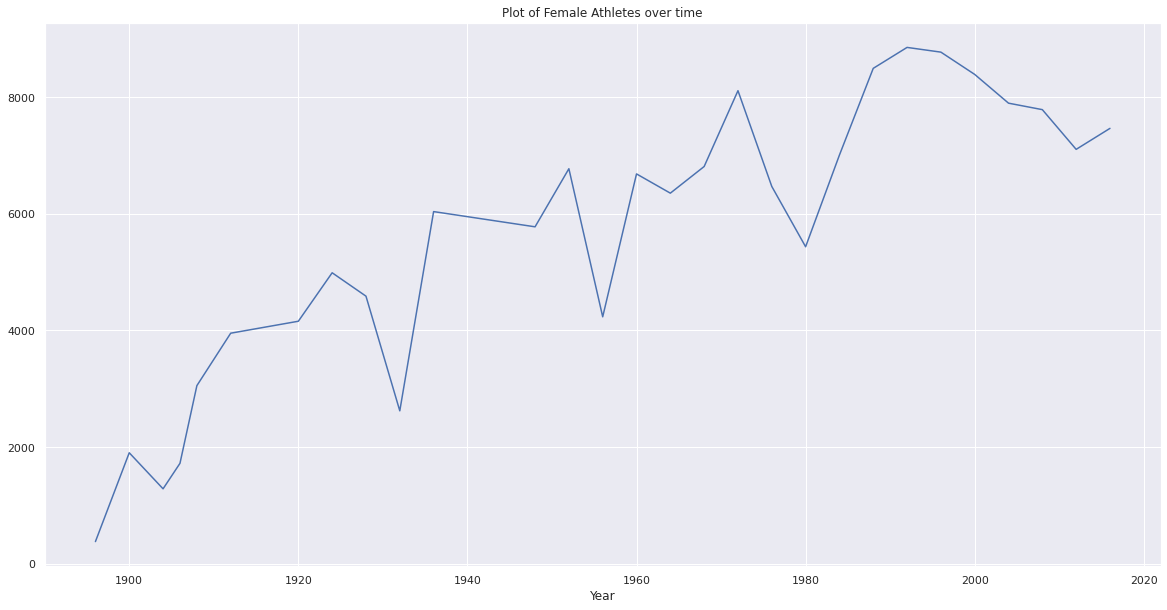

In [ ]:
part = summerMenOlympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,'M'].plot()
plt.title('Plot of Female Athletes over time')

In [ ]:
goldMedals = athlete_merged[(athlete_merged.Medal == 'Gold')]
goldMedals

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN


Text(0.5, 1.0, 'Gold Medals per Country')

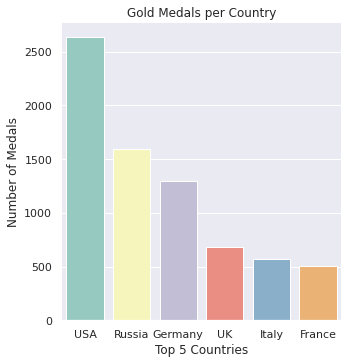

In [ ]:
#Top 5 Countries with highest gold medals
totalGoldMedals = goldMedals.Region.value_counts().reset_index(name='Medal').head(6)
plot = sns.catplot(x="index", y = "Medal", data = totalGoldMedals, height =5, kind='bar', palette="Set3")
plot.despine(left = True)
plot.set_xlabels("Top 5 Countries")
plot.set_ylabels("Number of Medals")
plt.title('Gold Medals per Country')

In [ ]:
athlete_merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [ ]:
#As there are 98% of null values we can drop this column
del athlete_merged['Notes']

In [ ]:
athlete_merged['Region'].isna().value_counts()

False    270746
True        370
Name: Region, dtype: int64

In [ ]:
#ID and Name are the attributes which doesn't contribute a lot for prediction so dropped those columns
#Data present Game,Sport and Region and found in other columns so we can drop them.
athlete_merged.drop(["ID","Name","Games","Sport","Region"],axis=1,inplace=True)
athlete_merged.head()


,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Event,Medal
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,NaN
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,NaN
2,M,24.0,175.0,70.0,Denmark,DEN,1920,Summer,Antwerpen,Football Men's Football,NaN
3,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,Gold
4,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating Women's 500 metres,NaN


In [ ]:
# Filling Nuls with NO as they represent no medal 
athlete_merged['Medal'].fillna("No",inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

In [ ]:
athlete_merged['Medal'].value_counts()

No        231333
Gold       13372
Bronze     13295
Silver     13116
Name: Medal, dtype: int64

In [ ]:
medal_types=['No','Bronze','Silver','Gold']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ordi=OrdinalEncoder(categories=[medal_types])
ordi.fit(athlete_merged[['Medal']])
athlete_merged['Medal']=pd.DataFrame(ordi.transform(athlete_merged[['Medal']]))

In [ ]:
athlete_merged['Medal'].value_counts()

0.0    231333
3.0     13372
1.0     13295
2.0     13116
Name: Medal, dtype: int64

In [ ]:
athlete_merged.head()

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Event,Medal
0,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball Men's Basketball,0.0
1,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo Men's Extra-Lightweight,0.0
2,M,24.0,175.0,70.0,Denmark,DEN,1920,Summer,Antwerpen,Football Men's Football,0.0
3,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War Men's Tug-Of-War,3.0
4,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating Women's 500 metres,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_df=pd.DataFrame(encoder.fit_transform(athlete_merged[['Sex']]).toarray())
athlete_merged=athlete_merged.join(encoded_df)
athlete_merged=athlete_merged.rename(columns={0:'E_female',1:'E_male'})
athlete_merged.drop(['Sex'],axis=1,inplace=True)

In [ ]:
encoded_season=pd.DataFrame(encoder.fit_transform(athlete_merged[['Season']]).toarray())
athlete_merged=athlete_merged.join(encoded_season)
athlete_merged=athlete_merged.rename(columns={0:'E_summer',1:'E_winter'})
athlete_merged.drop(['Season'],axis=1,inplace=True)
athlete_merged.head()

,Age,Height,Weight,Team,NOC,Year,City,Event,Medal,E_female,E_male,E_summer,E_winter
0,24.0,180.0,80.0,China,CHN,1992,Barcelona,Basketball Men's Basketball,0.0,0.0,1.0,1.0,0.0
1,23.0,170.0,60.0,China,CHN,2012,London,Judo Men's Extra-Lightweight,0.0,0.0,1.0,1.0,0.0
2,24.0,175.0,70.0,Denmark,DEN,1920,Antwerpen,Football Men's Football,0.0,0.0,1.0,1.0,0.0
3,34.0,175.0,70.0,Denmark/Sweden,DEN,1900,Paris,Tug-Of-War Men's Tug-Of-War,3.0,0.0,1.0,1.0,0.0
4,21.0,185.0,82.0,Netherlands,NED,1988,Calgary,Speed Skating Women's 500 metres,0.0,1.0,0.0,0.0,1.0


In [ ]:
team_frequency_map=athlete_merged['Team'].value_counts().to_dict()
athlete_merged['Team']=athlete_merged['Team'].map(team_frequency_map)

In [ ]:
NOC_frequency_map=athlete_merged['NOC'].value_counts().to_dict()
athlete_merged['NOC']=athlete_merged['NOC'].map(NOC_frequency_map)

In [ ]:
City_frequency_map=athlete_merged['City'].value_counts().to_dict()
athlete_merged['City']=athlete_merged['City'].map(City_frequency_map)

In [ ]:
City_frequency_map=athlete_merged['City'].value_counts().to_dict()
athlete_merged['City']=athlete_merged['City'].map(City_frequency_map)

In [ ]:
event_frequency_map=athlete_merged['Event'].value_counts().to_dict()
athlete_merged['Event']=athlete_merged['Event'].map(event_frequency_map)

In [ ]:
athlete_merged.head()

,Age,Height,Weight,Team,NOC,Year,City,Event,Medal,E_female,E_male,E_summer,E_winter
0,24.0,180.0,80.0,4975,5141,1992,12977,3280,0.0,0.0,1.0,1.0,0.0
1,23.0,170.0,60.0,4975,5141,2012,22426,341,0.0,0.0,1.0,1.0,0.0
2,24.0,175.0,70.0,3424,3570,1920,4292,5733,0.0,0.0,1.0,1.0,0.0
3,34.0,175.0,70.0,6,3570,1900,7169,170,3.0,0.0,1.0,1.0,0.0
4,21.0,185.0,82.0,5718,5839,1988,2639,467,0.0,1.0,0.0,0.0,1.0


In [ ]:
athlete_merged.drop(['E_female',"E_summer"],axis=1,inplace=True)


In [ ]:
X=athlete_merged[["Age","Height","Weight","Team","NOC","Year","City","Event","E_male","E_winter"]]
Y=athlete_merged[['Medal']]

In [ ]:
Y.head()

,Medal
0,0.0
1,0.0
2,0.0
3,3.0
4,0.0


In [ ]:
#X_train,X_test,Y_train,Y_Test=train_test_split(X,Y,test_size=0.33,random_state=30)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=50)

In [ ]:
X_train.shape

(181647, 10)

In [ ]:
Y_train.shape

(181647, 1)

In [ ]:
X_test.shape

(89469, 10)

In [ ]:
Y_test.shape

(89469, 1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= pd.DataFrame(sc.fit_transform(X_train))
X_test=pd.DataFrame(sc.fit_transform(X_test))

In [ ]:
X_train.columns=["Age","Height","Weight","Team","NOC","Year","City","Event","E_male","E_winter"]
X_test.columns=["Age","Height","Weight","Team","NOC","Year","City","Event","E_male","E_winter"]



In [ ]:
X_train.head()

,Age,Height,Weight,Team,NOC,Year,City,Event,E_male,E_winter
0,-0.077696,2.124084,2.260934,2.532436,2.494498,0.455158,0.480180,0.576975,0.616801,-0.46606
1,0.719057,-0.026959,-0.041106,-0.905009,-0.957924,-1.020487,2.205914,-0.072865,0.616801,-0.46606
2,2.790614,-0.026959,-0.438010,-0.583965,-0.638502,0.991757,0.594328,-0.944204,0.616801,-0.46606
3,2.471913,-0.672272,-0.993675,2.532436,2.494498,-0.349739,-0.321412,-0.502932,-1.621269,-0.46606
4,-0.077696,1.586324,1.705269,0.709571,0.657718,0.857607,0.951200,1.061339,0.616801,-0.46606


In [ ]:
X_test.head()

,Age,Height,Weight,Team,NOC,Year,City,Event,E_male,E_winter
0,-0.084417,0.185010,0.272479,1.276721,1.257944,0.990791,0.594364,0.179601,-1.630220,-0.469312
1,-0.242863,-0.464264,-0.285795,-0.088597,-0.159451,0.190764,-1.491146,-0.067102,0.613414,2.130779
2,0.074030,-0.897113,-0.923822,2.516360,2.479354,0.524109,-1.304563,-0.035298,0.613414,2.130779
3,-0.559755,-0.680688,-1.402342,-1.031815,-1.078865,0.590778,0.626734,-0.765092,-1.630220,-0.469312
4,0.074030,1.050709,1.149766,0.040043,-0.054845,0.324102,-1.399309,3.068692,0.613414,2.130779


In [ ]:
Y_train.head()

,Medal
209272,1.0
117879,0.0
47393,3.0
266068,0.0
138942,0.0


In [ ]:
Y_train=Y_train.astype(int)
Y_test=Y_test.astype(int)

In [ ]:
#Training random forrest model
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [ ]:
X_test.shape

(89469, 10)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report:\n\n", classification_report(Y_test, y_pred))

Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.99      0.94     76429
           1       0.70      0.21      0.33      4387
           2       0.67      0.25      0.36      4237
           3       0.70      0.34      0.46      4416

    accuracy                           0.88     89469
   macro avg       0.74      0.45      0.52     89469
weighted avg       0.86      0.88      0.86     89469

